In [1]:
%pylab inline
import sys

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import arviz as az

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm

rcParams['font.family'] = 'sans-serif'

sys.path.append('../')
from mederrata_spmf import PoissonMatrixFactorization


Populating the interactive namespace from numpy and matplotlib


In this notebook, we look at the $\mathcal{M}$-open setting, where the generating process is in the span of models.

# Generate a random matrices V, W

For V, assume that 10 variables share a factor structure and the other 20 are noise

In [2]:
N = 50000
D_factor = 10
D_noise = 20
D = D_factor + D_noise
P = 3

V = np.abs(np.random.normal(1.5, 0.5, size=(P,D_factor)))
Z = np.abs(np.random.normal(0.5, size=(N,P)))

ZV = Z.dot(V)

X = np.zeros((N, D_factor+D_noise))
X = np.random.poisson(1.,size=(N,D_noise+D_factor))
X[:, ::3] = np.random.poisson(ZV*np.exp(ZV/np.mean(ZV)/10)+(ZV/np.mean(ZV)/10)**2)

In [3]:
# Test taking in from tf.dataset, don't pre-batch
data = tf.data.Dataset.from_tensor_slices(
    {
        'data': X,
        'indices': np.arange(N),
        'normalization': np.ones(N)
    })

data = data.batch(10000)

In [4]:
next(iter(data))

{'data': <tf.Tensor: shape=(10000, 30), dtype=int64, numpy=
 array([[5, 0, 1, ..., 1, 1, 0],
        [6, 2, 0, ..., 5, 2, 1],
        [7, 0, 1, ..., 4, 3, 1],
        ...,
        [7, 0, 0, ..., 5, 0, 0],
        [0, 0, 1, ..., 0, 2, 3],
        [2, 3, 1, ..., 0, 1, 0]])>,
 'indices': <tf.Tensor: shape=(10000,), dtype=int64, numpy=array([   0,    1,    2, ..., 9997, 9998, 9999])>,
 'normalization': <tf.Tensor: shape=(10000,), dtype=float64, numpy=array([1., 1., 1., ..., 1., 1., 1.])>}

In [5]:
# strategy = tf.distribute.MirroredStrategy()
strategy = None
factor = PoissonMatrixFactorization(
    data, latent_dim=P, strategy=strategy,
    encoder_function=lambda x: x, decoder_function=lambda x: x,
    scale_rates=True, 
    u_tau_scale=1.0/P/D/np.sqrt(N),
    dtype=tf.float64)
# Test to make sure sampling works


Feature dim: 30 -> Latent dim 3


In [6]:
losses = factor.calibrate_advi(
    num_epochs=200, learning_rate=.1)




W0522 20:38:38.767412 4477640128 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1786: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Initial loss: 83.0783655766856
Epoch 1: average-batch loss: 70.8621084932872 last batch loss: 60.404416233035064
Saved a checkpoint: ./.tf_ckpts/chkpt-1
Epoch 2: average-batch loss: 58.864951225119924 last batch loss: 54.49909825608928
Saved a checkpoint: ./.tf_ckpts/chkpt-2
Epoch 3: average-batch loss: 52.299387484719055 last batch loss: 51.21243100167421
Saved a checkpoint: ./.tf_ckpts/chkpt-3
Epoch 4: average-batch loss: 49.63425611185613 last batch loss: 49.667687146380004
Saved a checkpoint: ./.tf_ckpts/chkpt-4
Epoch 5: average-batch loss: 48.99930275074395 last batch loss: 49.09519637677993
Saved a checkpoint: ./.tf_ckpts/chkpt-5
Epoch 6: average-batch loss: 48.994288427178404 last batch loss: 49.261998353013155
Saved a checkpoint: ./.tf_ckpts/chkpt-6
Epoch 7: average-batch loss: 48.99556670289023 last batch loss: 49.17692842683693
Epoch 8: average-batch loss: 49.01679830515447 last batch loss: 49.10364857770749
We are in a loss plateau learning rate: 0.025 loss: 48.9793726970482

Epoch 67: average-batch loss: 42.645966835969276 last batch loss: 42.64022760744666
Saved a checkpoint: ./.tf_ckpts/chkpt-65
Epoch 68: average-batch loss: 42.61634210625934 last batch loss: 42.61913656760956
Saved a checkpoint: ./.tf_ckpts/chkpt-66
Epoch 69: average-batch loss: 42.59109375477344 last batch loss: 42.604904274724866
Saved a checkpoint: ./.tf_ckpts/chkpt-67
Epoch 70: average-batch loss: 42.571589118243914 last batch loss: 42.58745733260952
Saved a checkpoint: ./.tf_ckpts/chkpt-68
Epoch 71: average-batch loss: 42.551851494883685 last batch loss: 42.573115135807775
Saved a checkpoint: ./.tf_ckpts/chkpt-69
Epoch 72: average-batch loss: 42.53670984717946 last batch loss: 42.54474938278986
Saved a checkpoint: ./.tf_ckpts/chkpt-70
Epoch 73: average-batch loss: 42.52732868691145 last batch loss: 42.53749322270422
Saved a checkpoint: ./.tf_ckpts/chkpt-71
Epoch 74: average-batch loss: 42.51477021604429 last batch loss: 42.52773189611581
Saved a checkpoint: ./.tf_ckpts/chkpt-72
Epo

Epoch 135: average-batch loss: 42.389391895769755 last batch loss: 42.41854327093949
Epoch 136: average-batch loss: 42.38792010464583 last batch loss: 42.41306282773808
Saved a checkpoint: ./.tf_ckpts/chkpt-114
Epoch 137: average-batch loss: 42.38650089942183 last batch loss: 42.410508337420765
Saved a checkpoint: ./.tf_ckpts/chkpt-115
Epoch 138: average-batch loss: 42.386889224790615 last batch loss: 42.41086509477946
Epoch 139: average-batch loss: 42.3859755122747 last batch loss: 42.40985087947782
Saved a checkpoint: ./.tf_ckpts/chkpt-116
Epoch 140: average-batch loss: 42.386467979393416 last batch loss: 42.409989758015804
Epoch 141: average-batch loss: 42.38599104604095 last batch loss: 42.409233420368395
Epoch 142: average-batch loss: 42.386245615870976 last batch loss: 42.415389729344795
Epoch 143: average-batch loss: 42.38507498557068 last batch loss: 42.408067274212975
Saved a checkpoint: ./.tf_ckpts/chkpt-117
Epoch 144: average-batch loss: 42.38562743010075 last batch loss: 42

In [7]:
waic = factor.waic()
print(waic)

{'waic': 1327682.97940259, 'se': 2057.40250427968, 'lppd': -458825.5184663558, 'pwaic': 205015.97123493918}


In [8]:
surrogate_samples = factor.surrogate_distribution.sample(1000)
weights = surrogate_samples['s']/tf.reduce_sum(surrogate_samples['s'],-2,keepdims=True)
intercept_data = az.convert_to_inference_data(
    {
        r"$w_d$": 
            (tf.squeeze(surrogate_samples['w'])*weights[:,-1,:]*factor.norm_factor).numpy().T})

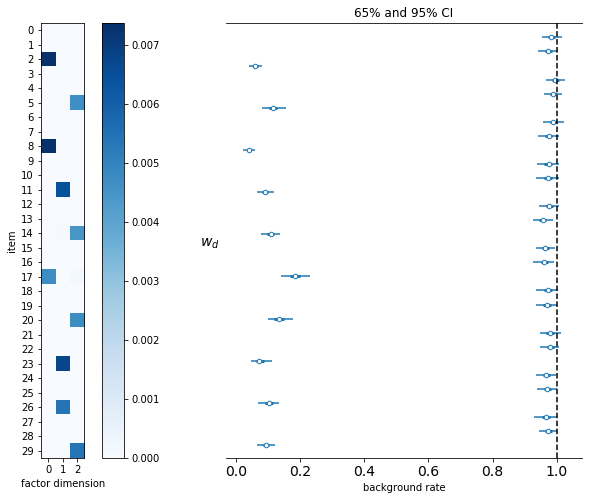

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14,8))
D = factor.feature_dim
pcm = ax[0].imshow(factor.encoding_matrix().numpy()[::-1,:], vmin=0, cmap="Blues")
ax[0].set_yticks(np.arange(D))
ax[0].set_yticklabels(np.arange(D))
ax[0].set_ylabel("item")
ax[0].set_xlabel("factor dimension")
ax[0].set_xticks(np.arange(P))
ax[0].set_xticklabels(np.arange(P))

fig.colorbar(pcm, ax=ax[0], orientation = "vertical")
az.plot_forest(intercept_data, ax=ax[1])
ax[1].set_xlabel("background rate")
ax[1].set_ylim((-0.014,.466))
ax[1].set_title("65% and 95% CI")
ax[1].axvline(1.0, linestyle='dashed', color="black")
plt.savefig('mix_nonlinear_factorization_sepmf.pdf', bbox_inches='tight')
plt.show()


In [10]:
factor.calibrated_expectations['s']/tf.reduce_sum(factor.calibrated_expectations['s'], axis=0, keepdims=True)

<tf.Tensor: shape=(2, 30), dtype=float64, numpy=
array([[0.90995538, 0.15612161, 0.15411992, 0.90326336, 0.15160937,
        0.15333726, 0.91983724, 0.15058745, 0.1563164 , 0.87884002,
        0.15466237, 0.1588083 , 0.86944361, 0.15731937, 0.14848741,
        0.885907  , 0.15754202, 0.15612652, 0.89539393, 0.15274423,
        0.15598429, 0.93466739, 0.15870842, 0.15908936, 0.90087423,
        0.15330195, 0.15409555, 0.93136404, 0.15736351, 0.15442183],
       [0.09004462, 0.84387839, 0.84588008, 0.09673664, 0.84839063,
        0.84666274, 0.08016276, 0.84941255, 0.8436836 , 0.12115998,
        0.84533763, 0.8411917 , 0.13055639, 0.84268063, 0.85151259,
        0.114093  , 0.84245798, 0.84387348, 0.10460607, 0.84725577,
        0.84401571, 0.06533261, 0.84129158, 0.84091064, 0.09912577,
        0.84669805, 0.84590445, 0.06863596, 0.84263649, 0.84557817]])>